# Logistic regression

In this notebook, we will attempt to perform a binary classification on the data, the two classes being not readmitted, or readmitted (in > or < 30 days). We will use the unprocessed (cleaned) dataset for now.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [6]:
# Load the cleaned data
df = pd.read_csv('./data/dataset_clean.csv')

# Create binary target
df['readmit_binary'] = df['readmitted'].apply(lambda x: 1 if (x == '<30') else 0)

In [7]:
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmit_binary
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,NO,0
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,Up,No,No,No,No,No,Ch,Yes,>30,0
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,Yes,NO,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,Steady,No,No,No,No,No,Ch,Yes,NO,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97104,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,51,...,Down,No,No,No,No,No,Ch,Yes,>30,0
97105,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,33,...,Steady,No,No,No,No,No,No,Yes,NO,0
97106,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,53,...,Down,No,No,No,No,No,Ch,Yes,NO,0
97107,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,45,...,Up,No,No,No,No,No,Ch,Yes,NO,0


In [8]:
  # Define features and target
X = df.drop(columns=['readmitted', 'readmit_binary'])
y = df['readmit_binary']

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, roc_curve, auc, accuracy_score

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [18]:
# --- Preprocessing ---
# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# --- Step 4: Define Base Model Pipeline ---
model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, solver='lbfgs'))
])

# --- Step 5: Fit Model ---
model.fit(X_train, y_train)



Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['encounter_id',
                                                   'patient_nbr',
                                                   'admission_type_id',
                                                   'discharge_disposition_id',
                                                   'admission_source_id',
                                                   'time_in_hospital',
                                                   'num_lab_procedures',
                                                   'num_procedures',
                                                   'num_medications',
                                                   'number_outpatient',
                                                   'number_emergency',
                                                   'number_inpatient',
                                                   'number_diagnoses']),
                                                 ('cat',
                                                  O...
                                                   'chlorpropamide',
                                                   'glimepiride',
                                                   'acetohexamide', 'glipizide',
                                                   'glyburide', 'tolbutamide',
                                                   'pioglitazone',
                                                   'rosiglitazone', 'acarbose',
                                                   'miglitol', 'troglitazone',
                                                   'tolazamide', 'examide',
                                                   'citoglipton', 'insulin',
                                                   'glyburide-metformin',
                                                   'glipizide-metformin',
                                                   'glimepiride-pioglitazone',
                                                   'metformin-rosiglitazone', ...])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [20]:
probs = model.predict_proba(X_test)
y_pred = (probs[:, 1]>=0.5)

Confusion Matrix:
[[17142    55]
 [ 2168    57]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     17197
           1       0.51      0.03      0.05      2225

    accuracy                           0.89     19422
   macro avg       0.70      0.51      0.49     19422
weighted avg       0.84      0.89      0.84     19422

Mean squared error =  0.1144578313253012
Accuracy =  0.8855421686746988
ROC AUC score =  0.653310918483953


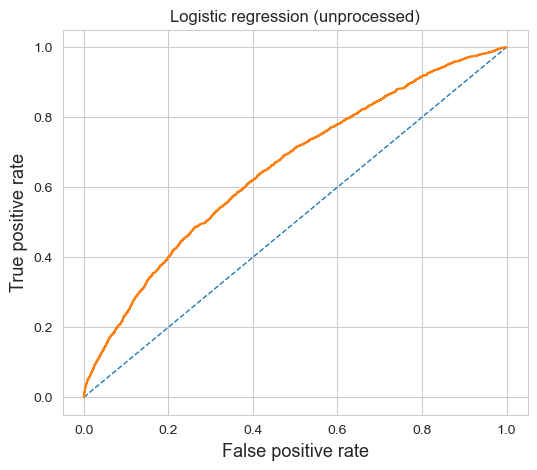

In [21]:
# --- Evaluate Model ---
#y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
false_pos_rate, true_pos_rate, thresholds = roc_curve(y_test, probs[:,1])
roc_auc = auc(false_pos_rate, true_pos_rate)

roc_data = pd.DataFrame({'X': false_pos_rate.tolist(), 'Y': true_pos_rate.tolist()})
roc_data.to_csv('./figs/plot_data/roc_curve_logreg-unpr.csv', index=False)
    
del roc_data

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Mean squared error = ",mse)
print("Accuracy = ",acc)
print("ROC AUC score = ",roc_auc)

plt.figure(figsize = (6,5))
plt.plot([0,1], [0,1], '--', lw=1)
plt.plot(false_pos_rate, true_pos_rate)
plt.xlabel('False positive rate', fontsize=13)
plt.ylabel('True positive rate', fontsize=13)
plt.title('Logistic regression (unprocessed)')
plt.show()

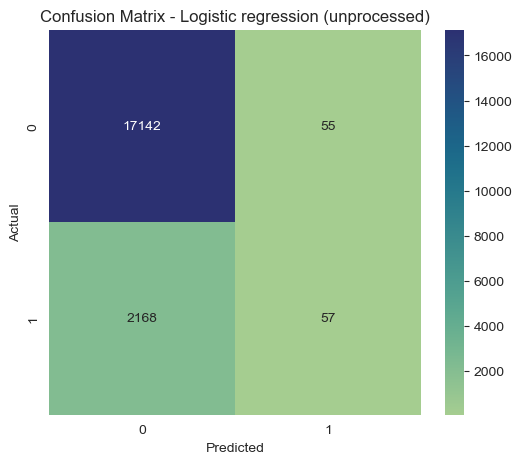

Confusion Matrix:
 [[17142    55]
 [ 2168    57]]


In [22]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 5))

sns.heatmap(cm, annot=True, cmap='crest', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic regression (unprocessed)')

plt.savefig('./figs/conf_mat_log_1.png')
plt.show()

# Print confusion matrix and classification report for detailed metrics
print("Confusion Matrix:\n", cm)